**CONNECTING TO  THE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**IMPORTING LIBRARIES**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


**READING THE DATABASE**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/card_transdata.csv")

data.head().style.background_gradient(cmap='Blues')


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.000000,1.000000,0.000000,0.000000,0.000000
1,10.829943,0.175592,1.294219,1.000000,0.000000,0.000000,0.000000,0.000000
2,5.091079,0.805153,0.427715,1.000000,0.000000,0.000000,1.000000,0.000000
3,2.247564,5.600044,0.362663,1.000000,1.000000,0.000000,1.000000,0.000000
4,44.190936,0.566486,2.222767,1.000000,1.000000,0.000000,1.000000,0.000000


In [ ]:
data.describe().style.set_properties(**{'background-color': 'black',                                                   
                                    'color': 'white',                       
                                    'border-color': 'white'})

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [ ]:
data.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

**DATA PRE-PROCESSING**

In [ ]:
data.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

**HEATMAP**

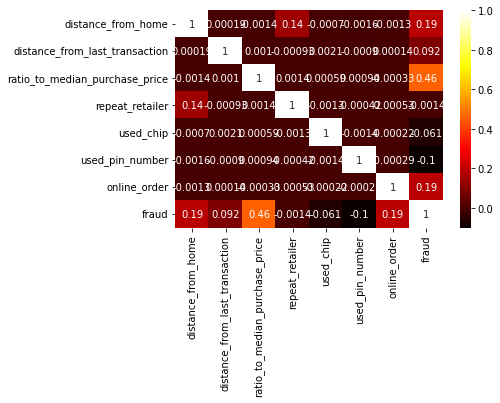

In [ ]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True,cmap="hot")


In [ ]:
for i in data.columns[3:]:
    print(data[i].value_counts())

1.0    881536
0.0    118464
Name: repeat_retailer, dtype: int64
0.0    649601
1.0    350399
Name: used_chip, dtype: int64
0.0    899392
1.0    100608
Name: used_pin_number, dtype: int64
1.0    650552
0.0    349448
Name: online_order, dtype: int64
0.0    912597
1.0     87403
Name: fraud, dtype: int64


In [ ]:
y = data["fraud"]
x = data.drop("fraud",axis=1)

**TRAIN AND TEST**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)

from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression()
regressor.fit(x_train,y_train)

y_pred = regressor.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**CONFUSION MATRIX**

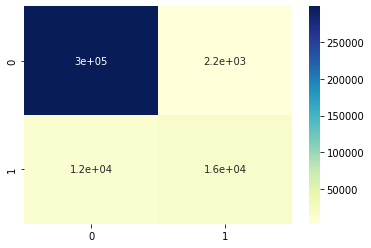

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,precision_score, recall_score

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="YlGnBu")

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    301295
         1.0       0.88      0.57      0.69     28705

    accuracy                           0.96    330000
   macro avg       0.92      0.78      0.83    330000
weighted avg       0.95      0.96      0.95    330000



**RECALL AND PRECISION**

In [ ]:
print(precision_score(y_test,y_pred))

print(recall_score(y_test,y_pred))

0.8800650054171181
0.5659641177495209
